In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Table of Contents

1. Importing The Libraries
2. Load The Dataset
3. Exploratrory Data Analysis
4. Recommending The Myntra Fashion Products
5. Conclusion

#1. Importing The Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.decomposition import TruncatedSVD

#2. Load The Dataset

In [53]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Datasets/myntra_products_catalog.csv")
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [54]:
df.iloc[0:2, 1:3]

,ProductName,ProductBrand
0,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue


## 3. Exploratory Data Analysis

In [55]:
#Number of rows and columns in the dataset
print("Number of Dimensions: {}".format(df.shape))

Number of Dimensions: (12491, 8)


In [56]:
#Total number of columns in the dataset
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [57]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [58]:
#Identifies the missing values in the dataset
df.isnull()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
12486,False,False,False,False,False,False,False,False
12487,False,False,False,False,False,False,False,False
12488,False,False,False,False,False,False,False,False
12489,False,False,False,False,False,False,False,True


In [59]:
#Sgws number of missing values present in the dataset
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

Here, we can observe that `PrimaryColor` Variable is having null values.

In [60]:
g=df.copy() #Storing Dataset into the new variable g
b=g.isnull().sum() #Assigning the new variable b to the isnull().sum()
b

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

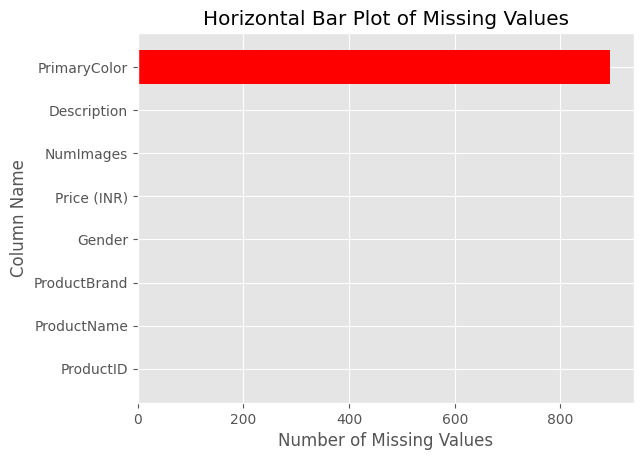

In [61]:
#horizontal bar plot for null values

# Create a horizontal bar chart with null values on the x-axis
plt.barh(b.index, b.values, color='red')
plt.xlabel("Number of Missing Values")
plt.ylabel("Column Name")
plt.title("Horizontal Bar Plot of Missing Values")
plt.show()

In [62]:
#Value counts for Product ID Variable
df['ProductID'].value_counts()

ProductID
10265199    1
10017413    1
10016283    1
10009781    1
10015921    1
           ..
10017749    1
1000795     1
10003803    1
10012765    1
10014413    1
Name: count, Length: 12491, dtype: int64

In [63]:
#Value Counts for Product Name Variable
df['ProductName'].value_counts()

ProductName
Parx Men Blue Slim Fit Checked Casual Shirt                             16
ZHEIA Women Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans       15
Roadster Men Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans      14
Sonari Pack of 2 Full-Coverage Bras                                     14
Roadster Men Blue Slim Fit Mid-Rise Clean Look Stretchable Jeans        13
                                                                        ..
Mast & Harbour Women Black Solid Lightweight Hooded Bomber Jacket        1
Hancock Men Navy Blue Slim Fit Checked Formal Trousers                   1
SUITLTD Black Single-Breasted Blazer                                     1
Latin Quarters Women Grey & Green Floral Printed Fit and Flare Dress     1
HRX by Hrithik Roshan Women Charcoal Grey Yoga Seamless Solid Tights     1
Name: count, Length: 10761, dtype: int64

In [64]:
#Value Counts for Product Brand Variable
df['ProductBrand'].value_counts()

ProductBrand
Indian Terrain        971
Puma                  345
Pepe Jeans            340
AURELIA               307
Flying Machine        301
                     ... 
I AM FOR YOU            1
Soulflower              1
Allen Solly Junior      1
Hoopers                 1
Pink Cow                1
Name: count, Length: 677, dtype: int64

In [65]:
#Value Counts for Gender Variable
df['Gender'].value_counts()

Gender
Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: count, dtype: int64

In [66]:
#Value Counts for Price Variable
df['Price (INR)'].value_counts()

Price (INR)
699     510
1299    464
1999    312
599     295
899     254
       ... 
313       1
1336      1
1682      1
1296      1
1132      1
Name: count, Length: 1543, dtype: int64

In [67]:
#Value Counts for Num of Images Column
df['NumImages'].value_counts()

NumImages
5     7134
4     1693
3     1211
6     1080
7     1057
2      174
8      102
9       24
1       13
10       3
Name: count, dtype: int64

In [68]:
#Value Counts for Primary Color Column
df['PrimaryColor'].value_counts()

PrimaryColor
Blue         3443
 Black       1640
 Red         1543
 Green        908
 White        880
 Grey         684
 Brown        473
 Yellow       406
 Pink         391
 Beige        236
 Gold         236
 Maroon       187
 Orange       130
 Silver       111
 Purple        65
 Burgundy      64
 Khaki         56
 Navy          54
 Lavender      19
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal      10
 Rose           8
 Platinum       3
 Bronze         3
 Peach          2
Name: count, dtype: int64

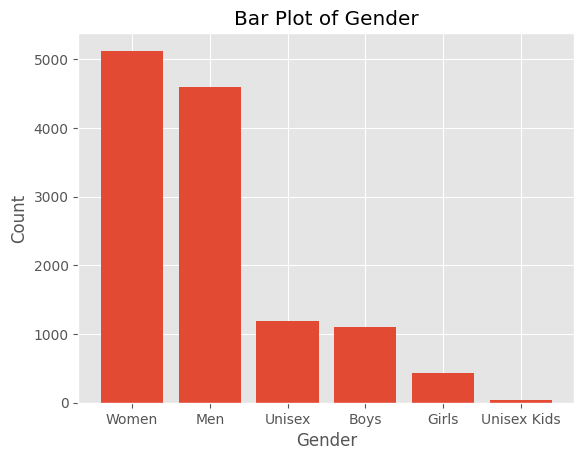

In [69]:
# Bar Plot for Gender

gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Bar Plot of Gender")
plt.show()

Here is the distribution of bar plot showing for who have shopped more.
We can observe that, women shopped more than men and others.

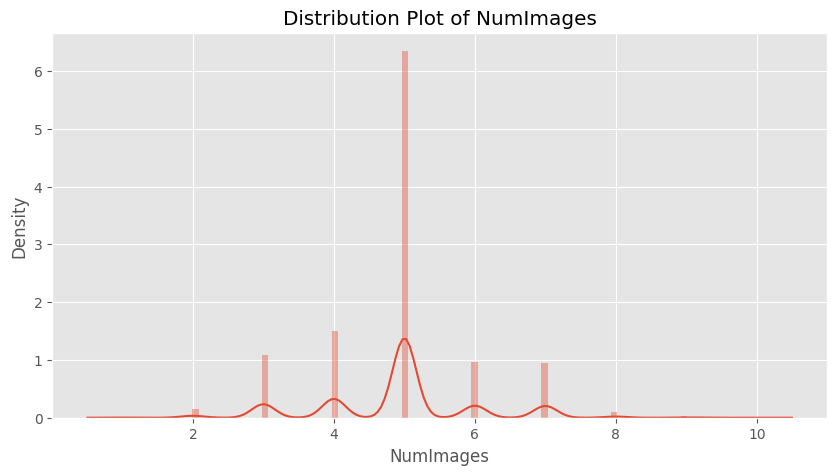

In [70]:
#Distplot for Num of Images Column
plt.figure(figsize=(10, 5))
sns.distplot(df['NumImages'], bins=100)
plt.title('Distribution Plot of NumImages')
plt.xlabel('NumImages')
plt.ylabel('Density')
plt.show()

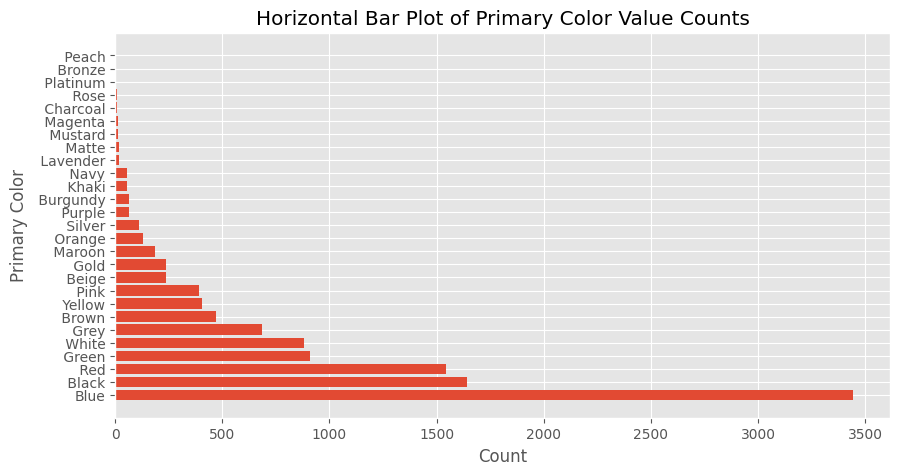

In [71]:
#  bar h plot for primarycolor value.count

color_counts = df['PrimaryColor'].value_counts()

plt.figure(figsize=(10, 5))
plt.barh(color_counts.index, color_counts.values)
plt.xlabel("Count")
plt.ylabel("Primary Color")
plt.title("Horizontal Bar Plot of Primary Color Value Counts")
plt.show()


In [72]:
#filling the null value

df['PrimaryColor'].fillna('NA', inplace=True)

In [73]:
df.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

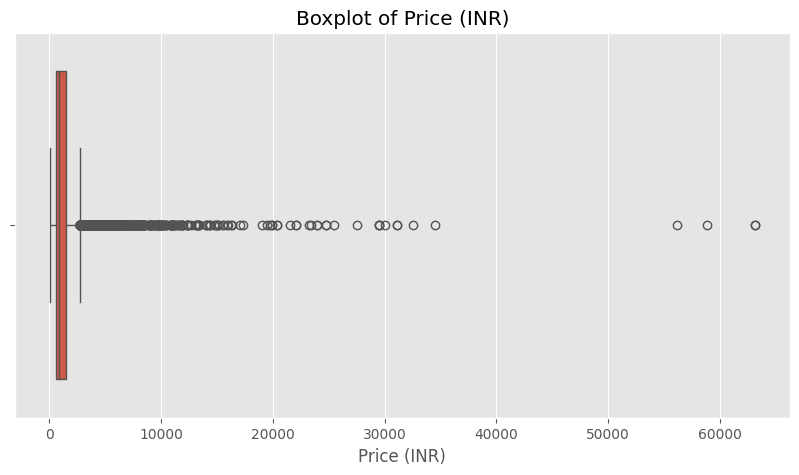

In [74]:
#boxplot

# Boxplot for Price (INR)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price (INR)'])
plt.xlabel('Price (INR)')
plt.title('Boxplot of Price (INR)')
plt.show()

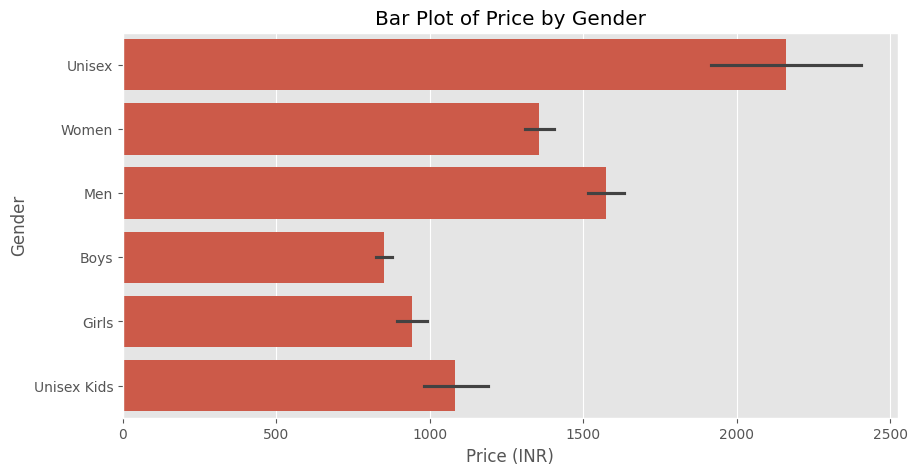

In [75]:
#Horizontal Bar Plot of Price and Gender Variables
plt.figure(figsize=(10, 5))
sns.barplot(x='Price (INR)', y='Gender', data=df)
plt.title('Bar Plot of Price by Gender')
plt.xlabel('Price (INR)')
plt.ylabel('Gender')
plt.show()

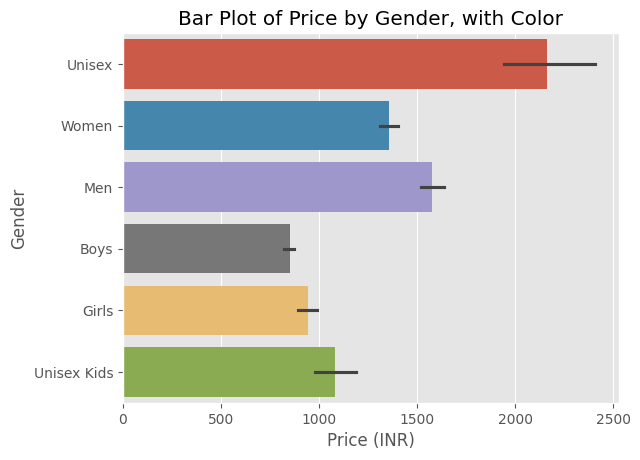

In [76]:
# Create a bar plot of Price by Gender, with color based on Gender
sns.barplot(x='Price (INR)', y='Gender', hue='Gender', data=df)
plt.title('Bar Plot of Price by Gender, with Color')
plt.xlabel('Price (INR)')
plt.ylabel('Gender')
plt.show()


In [77]:
#groupby function for Gender and Price Variable

df.groupby('Gender')['Price (INR)'].mean()

Gender
Boys            849.890909
Girls           941.459091
Men            1573.978872
Unisex         2161.124579
Unisex Kids    1082.717391
Women          1356.361295
Name: Price (INR), dtype: float64

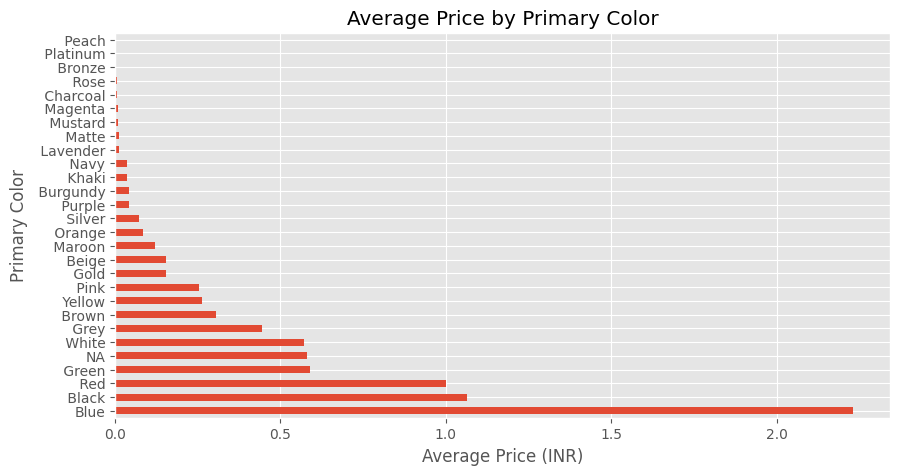

In [78]:
# Create a crosstab of PrimaryColor and Price (INR)
price_by_color = pd.crosstab(df['PrimaryColor'], df['Price (INR)'])

# Get the average price for each color
avg_price_by_color = price_by_color.mean(axis=1)

# Sort the average price in descending order
avg_price_by_color = avg_price_by_color.sort_values(ascending=False)

# Create a horizontal bar plot of the average price by color
plt.figure(figsize=(10, 5))
avg_price_by_color.plot(kind='barh')
plt.xlabel('Average Price (INR)')
plt.ylabel('Primary Color')
plt.title('Average Price by Primary Color')
plt.show()


In [79]:
#Top 10 Myntra Fashion Products with Price Tags
top_10_products = df.sort_values(by='Price (INR)', ascending=False).head(10)[['ProductName', 'Price (INR)']]
print(top_10_products)


                                            ProductName  Price (INR)
7465  Garmin Unisex Black Forerunner 945 Smartwatch ...        63090
7416  Garmin Unisex Blue Forerunner 945 Smartwatch 0...        63090
1568             MOVADO Men Black Analogue Watch 607243        58854
1376            MOVADO Women Blue Analogue Watch 607268        56192
9400   SEIKO Solar Women Silver Analogue watch SUP428P1        34500
1472   MOVADO Men Blue Swiss-Made Analogue Watch 607197        32532
470                DKNY Unisex Purple Large Trolley Bag        31100
960   DKNY Unisex Black & Grey Printed Large Trolley...        31100
6102  PRESTO Beige & Black Printed Handmade Anti-Ski...        29998
9646     SEIKO Solar Women Blue Analogue watch SUP433P1        29500


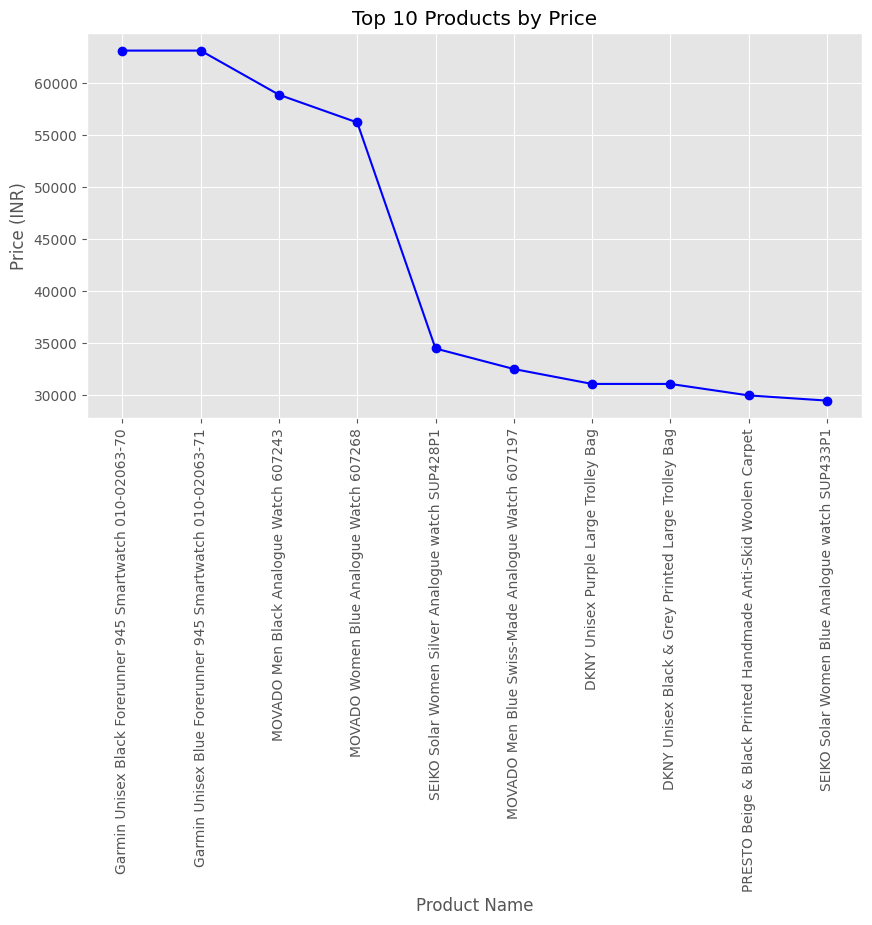

In [80]:
# Extract the top 10 product names and prices
product_names = top_10_products['ProductName'].tolist()
product_prices = top_10_products['Price (INR)'].tolist()

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(product_names, product_prices, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Price (INR)')
plt.title('Top 10 Products by Price')

# Set the x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [81]:
# Get the top 10 highest prices
top_10_prices = df.sort_values(by='Price (INR)', ascending=False).head(10)

# Extract the product names and prices
product_prices = top_10_prices['Price (INR)'].tolist()

# Extract the brands
brands = []
for product_name in product_names:
  brand = product_name.split(' ')[0]
  brands.append(brand)

# Create a DataFrame with the top 10 highest prices and brands
top_10_prices_df = pd.DataFrame({
  'Price (INR)': product_prices,
  'Brand': brands
})

# Print the DataFrame
print(top_10_prices_df)


   Price (INR)   Brand
0        63090  Garmin
1        63090  Garmin
2        58854  MOVADO
3        56192  MOVADO
4        34500   SEIKO
5        32532  MOVADO
6        31100    DKNY
7        31100    DKNY
8        29998  PRESTO
9        29500   SEIKO


In [82]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [83]:
#Mean of Product Brand and Price
df.groupby('ProductBrand')['Price (INR)'].mean().sort_values(ascending = False).head()

ProductBrand
Garmin      63090.000000
MOVADO      49192.666667
Maserati    23200.000000
SEIKO       18438.888889
BERING      16941.800000
Name: Price (INR), dtype: float64

In [84]:
#New dataframe ratings with the mean of Product Brand and the Price
ratings = pd.DataFrame(df.groupby('ProductBrand')['Price (INR)'].mean())
ratings.head()

,Price (INR)
ProductBrand,
109F,1299.0000
20Dresses,1153.0000
612 league,713.3125
7Rainbow,598.0000
AASK,1499.0000


In [85]:
#Creating a new column num of ratings
ratings['num of ratings'] = pd.DataFrame(df.groupby('ProductBrand')['Price (INR)'].count())
ratings.head()

,Price (INR),num of ratings
ProductBrand,,
109F,1299.0000,1
20Dresses,1153.0000,3
612 league,713.3125,16
7Rainbow,598.0000,3
AASK,1499.0000,1


<Axes: >

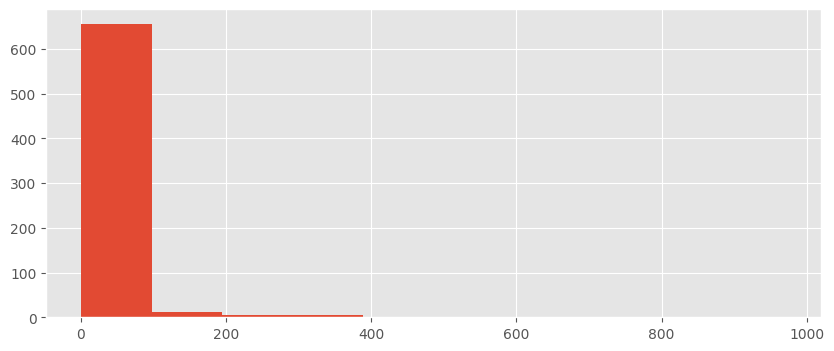

In [86]:
#Plot for num of ratings
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist()

#4. Recommending Myntra Fashion Products.

* Utility Matrix for Myntra Fashion Products

In [87]:
#Recommendation System
#Recommending Products based on Price Gender and Primary Color
myntra = df.pivot_table(values='Price (INR)', index='Gender', columns='ProductBrand',fill_value=0)
myntra



ProductBrand,109F,20Dresses,612 league,7Rainbow,AASK,ABELINO,ADIDAS,ADIDAS Originals,ADIVA,ADORENITE,...,meriggiare,mf,naughty ninos,pinwheel,plusS,shaze,shiloh,t-base,trueBrowns,yelloe
Gender,,,,,,,,,,,,,,,,,,,,,
Boys,0,0,736.454545,0,0,0,3999,0,0,0.000000,...,0,0.000000,0,0,0.00,0.000000,0,1119,0,0
Girls,0,0,662.400000,0,0,0,0,0,749,0.000000,...,0,0.000000,1349,0,0.00,0.000000,0,1174,0,0
Men,0,0,0.000000,0,0,0,3649,7199,0,0.000000,...,0,0.000000,0,0,1086.50,0.000000,0,0,0,0
Unisex,0,0,0.000000,0,0,0,0,0,0,0.000000,...,0,0.000000,0,0,0.00,0.000000,0,0,0,0
Unisex Kids,0,0,0.000000,0,0,0,0,0,0,0.000000,...,0,0.000000,0,0,0.00,0.000000,0,0,0,0
Women,1299,1153,0.000000,598,1499,442,0,5099,0,989.909091,...,999,995.666667,0,1599,677.75,2812.857143,439,0,1724,774


In [88]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Price (INR),num of ratings
ProductBrand,,
Indian Terrain,966.057673,971
Puma,2700.130435,345
Pepe Jeans,868.794118,340
AURELIA,1034.879479,307
Flying Machine,835.112957,301
W,1509.363985,261
U.S. Polo Assn. Kids,1081.927350,234
Roadster,991.262931,232
GAP,1404.462963,216


In [89]:
#Getting the user ratings for Indan Terrain and Puma Brand
indian_terrain_user_ratings = myntra['Indian Terrain']
puma_user_ratings = myntra['Puma']
indian_terrain_user_ratings.head()

Gender
Boys            624.009804
Girls             0.000000
Men            1123.451128
Unisex            0.000000
Unisex Kids       0.000000
Name: Indian Terrain, dtype: float64

In [90]:
#Finding the correlation for Indian Terrain and Puma Brand
similar_to_indian_terrain = myntra.corrwith(indian_terrain_user_ratings)
similar_to_puma = myntra.corrwith(puma_user_ratings)

In [91]:
#Finding the correlation for the brands
corr_IndianTerrain = pd.DataFrame(similar_to_indian_terrain,columns=['Correlation'])
corr_IndianTerrain.dropna(inplace=True)
corr_IndianTerrain.head(10)

,Correlation
ProductBrand,
109F,-0.298470
20Dresses,-0.298470
612 league,0.060279
7Rainbow,-0.298470
AASK,-0.298470
ABELINO,-0.298470
ADIDAS,0.923878
ADIDAS Originals,0.581135
ADIVA,-0.298470


In [92]:
#correlation for IndianTerrain Brand compared with other brands
corr_IndianTerrain.sort_values('Correlation',ascending=False).head(10)

,Correlation
ProductBrand,
Indian Terrain,1.000000
VASTRAMAY,0.955753
ADIDAS,0.923878
SUITLTD,0.852857
Unshaven,0.852857
Urban Dog,0.852857
Sweet Dreams,0.852857
Carven,0.852857
Bene Kleed,0.852857


In [93]:
corr_IndianTerrain = corr_IndianTerrain.join(ratings['num of ratings'])
corr_IndianTerrain.head()

,Correlation,num of ratings
ProductBrand,,
109F,-0.298470,1
20Dresses,-0.298470,3
612 league,0.060279,16
7Rainbow,-0.298470,3
AASK,-0.298470,1


In [94]:
corr_IndianTerrain[corr_IndianTerrain['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
ProductBrand,,
Indian Terrain,1.000000,971
Next Look,0.852857,107
Parx,0.852857,154
WROGN,0.852857,175
Calvin Klein Jeans,0.852857,131



From the above,
- Followed by InndianTerrain Brand, The next brand in Next Look, Parx, Wrogn and Calvin Klein Jeans.
- So, the Myntra shopping app first recommend these products.

In [95]:
corr_Puma = pd.DataFrame(similar_to_puma,columns=['Correlation'])
corr_Puma.dropna(inplace=True)
corr_Puma = corr_Puma.join(ratings['num of ratings'])
corr_Puma[corr_Puma['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
ProductBrand,,
Puma,1.000000,345
Roadster,0.839838,232
Titan,0.811026,107
HERE&NOW,0.615594,164
Park Avenue,0.514687,173


From the above,
* Followed by Puma Brand, The next brand in Roadster, Titan, HERE&NOW
  and Park Avenue.
* So, the Myntra shopping app first recommend these products.

#5. Conclusion
From the above, we can observe that,
* The one who shops more is Women.
* IndianTerrain is the most wanted brand.